In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
seasons={}

In [3]:
for year in range(1979,2022):
    
    url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'.format(year)
    r = requests.get(url)
    r_html = r.text
    soup = BeautifulSoup(r_html,'html.parser')
    table=soup.find_all(class_="full_table")
    table=soup.find_all(class_="full_table")

    """ Extracting List of column names"""
    head=soup.find(class_="thead")
    column_names_raw=[head.text for item in head][0]
    column_names_polished=column_names_raw.replace("\n",",").split(",")[2:-1]
    ['Player',
     'Pos',
     'Age',
     'Tm',
     'G',
     'GS',
     'MP',
     'FG',
     'FGA',
     'FG%',
     '3P',
     '3PA',
     '3P%',
     '2P',
     '2PA',
     '2P%',
     'eFG%',
     'FT',
     'FTA',
     'FT%',
     'ORB',
     'DRB',
     'TRB',
     'AST',
     'STL',
     'BLK',
     'TOV',
     'PF',
     'PTS']
    """Extracting full list of player_data"""
    players=[]

    for i in range(len(table)):

            player_=[]

            for td in table[i].find_all("td"):
                player_.append(td.text)

            players.append(player_)
    df=pd.DataFrame(players, columns=column_names_polished).set_index("Player")
    #cleaning the player's name from occasional special characters
    df.index=df.index.str.replace('*', '')
    seasons[year]=df


In [4]:
url = 'https://www.basketball-reference.com/leaders/ws_career_p.html#tot::2'
playoffs=pd.read_html(url)
playoffs=playoffs[0]
for index, row in playoffs.iterrows():
     playoffs.at[index, 'Player']= re.match(r'[A-Za-z+\s]+', row['Player'] )[0]
playoffs=playoffs.set_index("Player")
playoffs=playoffs.drop('Rank', axis =1)

playoffs

,WS
Player,
LeBron James,55.68
Michael Jordan,39.76
Tim Duncan,37.84
Kareem Abdul,35.56
Magic Johnson,32.63
...,...
Mario Chalmers,5.24
Antonio Daniels,5.19
Andrew Bynum,5.18


In [5]:
for year in seasons:
    seasons[year] =seasons[year].replace(np.NaN,0 )
    seasons[year] =seasons[year].replace('',0 )
    seasons[year]=seasons[year].drop('Pos', axis =1)
    seasons[year]=seasons[year].drop('Age', axis =1)
    seasons[year]=seasons[year].drop('FG%', axis =1)
    seasons[year]=seasons[year].drop('FT%', axis =1)
    seasons[year]=seasons[year].drop('eFG%', axis =1)
    seasons[year]=seasons[year].drop('2P%', axis =1)
    seasons[year]=seasons[year].drop('3P%', axis =1)
    seasons[year]=seasons[year].drop('Tm', axis =1)

In [6]:
combined=seasons[1979].merge(seasons[1980],how='outer', on='Player')
combined.insert(3,'career_PTS', 0)
combined.insert(3,'career_FG', 0)
combined.insert(3,'career_G', 0)
combined.insert(3,'career_GS', 0)
combined.insert(3,'career_MP', 0)
combined.insert(3,'career_FGA', 0)

combined.insert(3,'career_2P', 0)
combined.insert(3,'career_2PA', 0)
combined.insert(3,'career_3P', 0)
combined.insert(3,'career_3PA', 0)
combined.insert(3,'career_FT', 0)
combined.insert(3,'career_FTA', 0)
combined.insert(3,'career_ORB', 0)
combined.insert(3,'career_DRB', 0)

combined.insert(3,'career_TRB', 0)
combined.insert(3,'career_AST', 0)
combined.insert(3,'career_STL', 0)
combined.insert(3,'career_BLK', 0)
combined.insert(3,'career_TOV', 0)
combined.insert(3,'career_PF', 0)
#do percent here
combined.insert(3,'career_FG%', 0)
combined.insert(3,'career_2P%', 0)
combined.insert(3,'career_3P%', 0)
combined.insert(3,'career_FT%', 0)
combined.insert(3,'career_eFG%', 0)
combined =combined.replace(np.NaN,0 )
combined =combined.replace('',0 )

for index, row in combined.iterrows():
    #print(int(row['PTS_x'])+int(row['PTS_y']))
    combined.at[index, 'career_FG']=int(row['FG_x'])+int(row['FG_y'])
    combined.at[index, 'career_PTS']= int(row['PTS_x'])+int(row['PTS_y'])
    combined.at[index, 'career_G']=int(row['G_x'])+int(row['G_y'])
    combined.at[index, 'career_GS']= int(row['GS_x'])+int(row['GS_y'])
    combined.at[index, 'career_MP']= int(row['MP_x'])+int(row['MP_y'])
    combined.at[index, 'career_FGA']= int(row['FGA_x'])+int(row['FGA_y'])
    
    combined.at[index, 'career_2P']=int(row['2P_x'])+int(row['2P_y'])
    combined.at[index, 'career_2PA']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_3P']=int(row['3P_x'])+int(row['3P_y'])
    combined.at[index, 'career_3PA']= int(row['3PA_x'])+int(row['3PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    combined.at[index, 'career_TRB']= int(row['TRB_x'])+int(row['TRB_y'])
    
    combined.at[index, 'career_TRB']= int(row['2PA_x'])+int(row['2PA_y'])
    combined.at[index, 'career_FT']=int(row['FT_x'])+int(row['FT_y'])
    combined.at[index, 'career_FTA']= int(row['FTA_x'])+int(row['FTA_y'])
    combined.at[index, 'career_ORB']= int(row['ORB_x'])+int(row['ORB_y'])
    combined.at[index, 'career_DRB']= int(row['DRB_x'])+int(row['DRB_y'])
    
    combined.at[index, 'career_TRB']=int(row['TRB_x'])+int(row['TRB_y'])
    combined.at[index, 'career_AST']= int(row['AST_x'])+int(row['AST_y'])
    combined.at[index, 'career_STL']= int(row['STL_x'])+int(row['STL_y'])
    combined.at[index, 'career_BLK']= int(row['BLK_x'])+int(row['BLK_y'])
    
    combined.at[index, 'career_TOV']= int(row['TOV_x'])+int(row['TOV_y'])
    combined.at[index, 'career_PF']= int(row['PF_x'])+int(row['PF_y'])
    
   

combined=combined.drop('PTS_y', axis =1)
combined=combined.drop('FG_y', axis =1)
combined=combined.drop('PTS_x', axis =1)
combined=combined.drop('FG_x', axis =1)
combined=combined.drop('G_x', axis =1)
combined=combined.drop('G_y', axis =1)
combined=combined.drop('GS_x', axis =1)
combined=combined.drop('GS_y', axis =1)
combined=combined.drop('MP_x', axis =1)
combined=combined.drop('MP_y', axis =1)
combined=combined.drop('FGA_x', axis =1)
combined=combined.drop('FGA_y', axis =1)
combined=combined.drop('2P_x', axis =1)
combined=combined.drop('2P_y', axis =1)
combined=combined.drop('2PA_x', axis =1)
combined=combined.drop('2PA_y', axis =1)
combined=combined.drop('3P_x', axis =1)
combined=combined.drop('3P_y', axis =1)
combined=combined.drop('3PA_x', axis =1)
combined=combined.drop('3PA_y', axis =1)
combined=combined.drop('FT_x', axis =1)
combined=combined.drop('FT_y', axis =1)
combined=combined.drop('FTA_x', axis =1)
combined=combined.drop('FTA_y', axis =1)
combined=combined.drop('ORB_x', axis =1)
combined=combined.drop('ORB_y', axis =1)
combined=combined.drop('DRB_x', axis =1)
combined=combined.drop('DRB_y', axis =1)
combined=combined.drop('TRB_x', axis =1)
combined=combined.drop('TRB_y', axis =1)
combined=combined.drop('AST_x', axis =1)
combined=combined.drop('AST_y', axis =1)
combined=combined.drop('STL_x', axis =1)
combined=combined.drop('STL_y', axis =1)
combined=combined.drop('BLK_x', axis =1)
combined=combined.drop('BLK_y', axis =1)
combined=combined.drop('TOV_x', axis =1)
combined=combined.drop('TOV_y', axis =1)
combined=combined.drop('PF_x', axis =1)
combined=combined.drop('PF_y', axis =1)

In [7]:
for year in range(1981,2022):
  
    print(year)
    combined=combined.merge(seasons[year],how='outer', on='Player')
       
    combined =combined.replace(np.NaN,0 )
   
    for index, row in combined.iterrows():
        
        combined.at[index, 'career_FG']=int(row['career_FG'])+int(row['FG'])
        combined.at[index, 'career_PTS']= int(row['career_PTS'])+int(row['PTS'])
        combined.at[index, 'career_G']= int(row['career_G'])+int(row['G'])
        combined.at[index, 'career_GS']= int(row['career_GS'])+int(row['GS'])
        combined.at[index, 'career_MP']= int(row['career_MP'])+int(row['MP'])
        combined.at[index, 'career_FGA']= int(row['career_FGA'])+int(row['FGA'])
        
        combined.at[index, 'career_2P']=int(row['career_2P'])+int(row['2P'])
        combined.at[index, 'career_2PA']= int(row['career_2PA'])+int(row['2PA'])
        combined.at[index, 'career_3P']=int(row['career_3P'])+int(row['3P'])
        combined.at[index, 'career_3PA']= int(row['career_3PA'])+int(row['3PA'])
        combined.at[index, 'career_FT']= int(row['career_FT'])+int(row['FT'])
        combined.at[index, 'career_FTA']= int(row['career_FTA'])+int(row['FTA'])
        combined.at[index, 'career_ORB']= int(row['career_ORB'])+int(row['ORB'])
        combined.at[index, 'career_DRB']= int(row['career_DRB'])+int(row['DRB'])
        combined.at[index, 'career_BLK']= int(row['career_BLK'])+int(row['BLK'])
        
        combined.at[index, 'career_TRB']=int(row['career_TRB'])+int(row['TRB'])
        combined.at[index, 'career_STL']= int(row['career_STL'])+int(row['STL'])
        combined.at[index, 'career_AST']= int(row['career_AST'])+int(row['AST'])
        combined.at[index, 'career_TOV']= int(row['career_TOV'])+int(row['TOV'])
        combined.at[index, 'career_PF']= int(row['career_PF'])+int(row['PF'])

        #combined.at[index, 'career_2P%']= int(row['career_2P'])/(int(row['career_2PA']+1))
        #combined.at[index, 'career_3P%']= int(row['career_3P'])/(int(row['career_3PA']+1))
        
    #combined=combined.drop('PTS_y', axis =1)
    combined=combined.drop('PTS', axis =1)
    combined=combined.drop('FG', axis =1)
    combined=combined.drop('G', axis =1)
    combined=combined.drop('GS', axis =1)
    combined=combined.drop('MP', axis =1)
    combined=combined.drop('FGA', axis =1)
    
    combined=combined.drop('2P', axis =1)
    combined=combined.drop('2PA', axis =1)
    combined=combined.drop('3P', axis =1)
    combined=combined.drop('3PA', axis =1)
    combined=combined.drop('FT', axis =1)
    combined=combined.drop('FTA', axis =1)
    combined=combined.drop('ORB', axis =1)
    combined=combined.drop('DRB', axis =1)
    combined=combined.drop('TRB', axis =1)
    combined=combined.drop('AST', axis =1)
    combined=combined.drop('STL', axis =1)
    combined=combined.drop('BLK', axis =1)
    combined=combined.drop('TOV', axis =1)
    combined=combined.drop('PF', axis =1)
combined['career_2P%']=combined['career_2P']/(combined['career_2PA'])
combined['career_3P%']=combined['career_3P']/(combined['career_3PA'])
combined['career_FT%']=combined['career_FT']/(combined['career_FTA'])
combined['career_FG%']=combined['career_FG']/(combined['career_FGA'])

combined['career_eFG%']=(combined['career_2P']+.5*combined['career_3P'])/(combined['career_FGA'])

combined

1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


,career_eFG%,career_FT%,career_3P%,career_2P%,career_FG%,career_PF,career_TOV,career_BLK,career_STL,career_AST,...,career_3PA,career_3P,career_2PA,career_2P,career_FGA,career_MP,career_GS,career_G,career_FG,career_PTS
Player,,,,,,,,,,,,,,,,,,,,,
Kareem Abdul-Jabbar,0.572200,0.742593,0.055556,0.572952,0.572238,2488.0,2319.0,1910.0,660.0,2651.0,...,18.0,1.0,13036.0,7469.0,13054.0,28832.0,625.0,867.0,7470.0,18149.0
Tom Abernethy,0.492350,0.702020,0.000000,0.493724,0.492350,285.0,79.0,28.0,81.0,185.0,...,2.0,0.0,717.0,354.0,719.0,2739.0,0.0,176.0,354.0,847.0
Alvan Adams,0.507384,0.809458,0.133333,0.508199,0.507507,2438.0,1960.0,542.0,987.0,3015.0,...,15.0,2.0,8111.0,4122.0,8126.0,20355.0,342.0,766.0,4124.0,10013.0
Lucius Allen,0.396552,0.575758,NaN,0.396552,0.396552,52.0,30.0,6.0,21.0,44.0,...,0.0,0.0,174.0,69.0,174.0,413.0,0.0,31.0,69.0,157.0
Kim Anderson,0.311688,0.535714,NaN,0.311688,0.311688,42.0,22.0,5.0,4.0,15.0,...,0.0,0.0,77.0,24.0,77.0,224.0,0.0,21.0,24.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Williams,0.431818,0.728000,0.391304,0.515385,0.482955,126.0,98.0,46.0,64.0,99.0,...,138.0,54.0,390.0,201.0,528.0,1983.0,71.0,71.0,255.0,655.0
Dylan Windler,0.338462,0.777778,0.337662,0.584906,0.438462,37.0,32.0,12.0,19.0,33.0,...,77.0,26.0,53.0,31.0,130.0,513.0,0.0,31.0,57.0,161.0
Cassius Winston,0.303030,0.833333,0.470588,0.375000,0.424242,8.0,5.0,1.0,2.0,12.0,...,17.0,8.0,16.0,6.0,33.0,98.0,0.0,22.0,14.0,41.0


Player
LeBron James        41150.2
Karl Malone         39401.6
Michael Jordan      36432.1
John Stockton       35781.2
Kobe Bryant         35331.2
Dirk Nowitzki       33220.7
Shaquille O'Neal    32228.2
Kevin Garnett       32208.5
Tim Duncan          31253.5
Chris Paul          30966.5
Name: off_rating, dtype: float64
Player
Shaquille O'Neal     8999.879199
Michael Jordan       8129.272536
Dirk Nowitzki        7186.098107
Kevin Garnett        6945.778427
LaMarcus Aldridge    6945.087215
Alex English         6936.794389
LeBron James         6671.504377
Karl Malone          6638.687617
Horace Grant         6402.925750
Tim Duncan           6274.505476
Name: off_rating_2, dtype: float64


/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<BarContainer object of 1 artists>

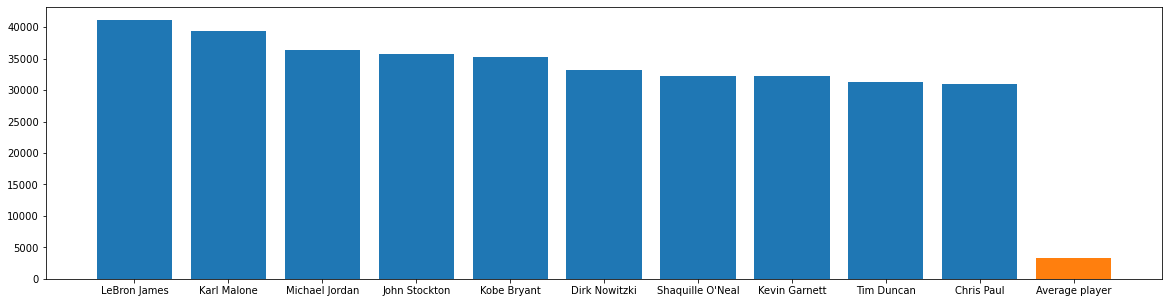

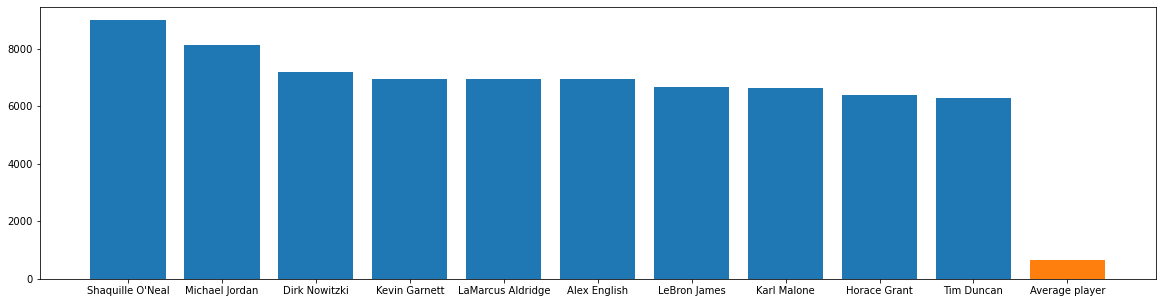

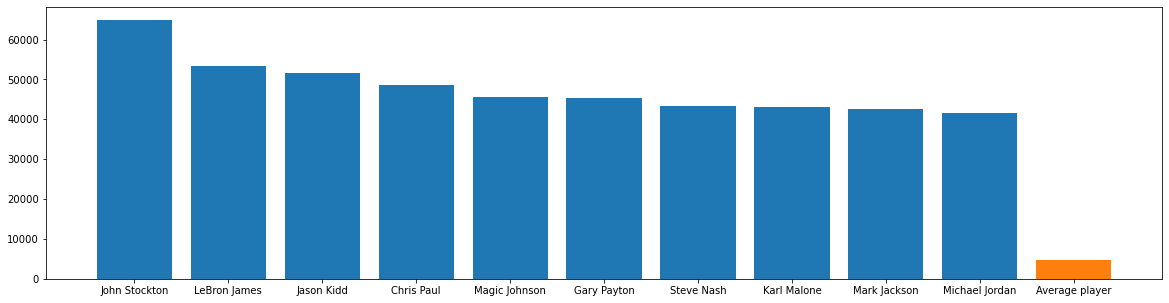

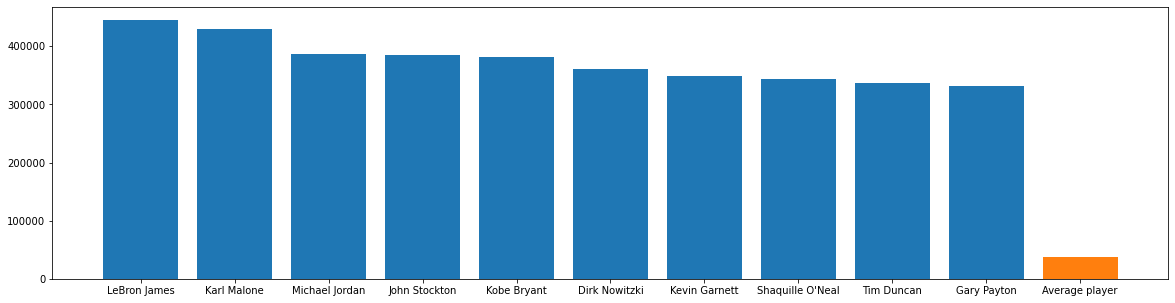

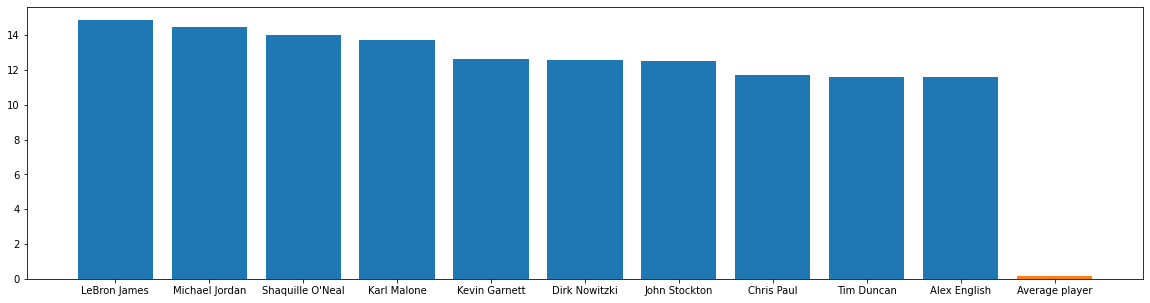

In [8]:
#merge with win percentage
combined=combined.merge(playoffs,how='left', on='Player')
#combined=combined.drop('WS/48_x', axis =1)
#combined.rename(columns={"WS/48_x":"career_playoff_WS/48"})

#Offensive weighting

#looking at overall totals
combined['off_rating']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])

#incorporating shooting efficiency
combined['off_rating_2']= ((2*combined['career_2P']*combined['career_2P%'])+(3*combined['career_3P']*combined['career_3P%'])
                           +.5*combined['career_AST']-3*combined['career_TOV']+combined['career_ORB'])

#emphasizing team play and looking at games played
combined['off_rating_3']=(.8*combined['career_PTS']+4*combined['career_AST']
                          -4*combined['career_TOV']+3*combined['career_ORB'])


combined['off_rating_4']= (combined['career_PTS']+1.7*combined['career_AST']-3*combined['career_TOV']+2*combined['career_ORB'])*np.log(combined['career_MP'])

combined.sort_values(by=['off_rating'], inplace=True, ascending=False)
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating'])
plt.bar(['Average player'], [combined['career_PTS'].mean()])
print(combined[0:10]['off_rating'])
combined.sort_values(by=['off_rating_2'], inplace=True, ascending=False)
print(combined[0:10]['off_rating_2'])
plt.figure(figsize=(20, 5))

plt.bar(combined[0:10].index, combined[0:10]['off_rating_2'])
plt.bar(['Average player'], [combined['off_rating_2'].mean()])

plt.figure(figsize=(20, 5))
combined.sort_values(by=['off_rating_3'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['off_rating_3'])
plt.bar(['Average player'], [combined['off_rating_3'].mean()])

plt.figure(figsize=(20, 5))
combined.sort_values(by=['off_rating_4'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['off_rating_4'])
plt.bar(['Average player'], [combined['off_rating_4'].mean()])

#final is combination of ratings
combined['overall_off_rating']= (.9*(combined['off_rating']-combined['off_rating'].mean())/combined['off_rating'].std()+
                                 (combined['off_rating_2']-combined['off_rating_2'].mean())/combined['off_rating_2'].std()+
                                 .6*(combined['off_rating_3']-combined['off_rating_3'].mean())/combined['off_rating_3'].std()
                                )

plt.figure(figsize=(20, 5))
combined.sort_values(by=['overall_off_rating'], inplace=True, ascending=False)

plt.bar(combined[0:10].index, combined[0:10]['overall_off_rating'])
plt.bar(['Average player'], [combined['overall_off_rating'].mean()])



# Analysis of NBA Players' Salaries

&emsp;&emsp;In this section, we will analyze NBA Player Salaries and how they have changed over time. To begin, we need a dataset of NBA salaries and their respective names. I was able to find a csv of player salaries that gives player ids and the salaries they earned, which I converted to an excel file. Because a player's salary changes every year depending on their contract, there are multiple rows with the same player name but different salaries. To differentiate between these rows, the year is also given so we know when the player got paid the specific salary. Only player ids are given for the salaries, so we also need to use the "players" dataset in which we will merge later to obtain the names of the players. We will assign "salaries" to represent a dataframe containing data from the salaries dataset, and "players" to represent a dataframe containing data from the players dataset. 

In [9]:
salaries = pd.read_excel('salaries_1985to2018.xlsx')
players = pd.read_excel('players.xlsx')

salaries

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
...,...,...,...,...,...,...,...
14158,NBA,zipsepa01,750000,2016-17,2017,2016,Chicago Bulls
14159,NBA,zipsepa01,1312611,2017-18,2018,2017,Chicago Bulls
14160,NBA,zizican01,1645200,2017-18,2018,2017,Cleveland Cavaliers
14161,NBA,zubaciv01,1034956,2016-17,2017,2016,Los Angeles Lakers


&emsp;&emsp;We need to find how many years the salaries dataframe spans over. We can find the maximum and minimum years of the dataframe by calling the max and min methods on salaries['season_start']. Printing it out shows us that the first year of the dataframe is 1984, and the last year of the dataframe is 2017. <br> <br>
&emsp;&emsp;Now that we know the year bounds of the dataframe, we can start dividing up the salaries dataframe into smaller dataframes that are categorized by year so we can see how the salaries of NBA players changed over time. This is also necessary for future analysis because of inflation over time: 20 million USD was worth a lot more in 1996 than it was in 2017, so it would be inaccurate to compare the salaries from different years. The first step is to join all these dataframes together using a dictionary. A dictionary called "seasons_salaries" is created below. A for loop from 1984 to 2017 is created (called i), and then the salaries dataframe will be iterated so that when the "season_start" column is equal to the year (called i), that row will be added to that specific year. After the salaries dataframe is done iterating, a dataframe of the collected data from that specific year will be created, and then indexed to the dictionary. For example, for the year 1984, seasons_salaries[1984] will contain the dataframe of player salaries from 1984. 

In [10]:
max_season = salaries['season_start'].max()
min_season = salaries['season_start'].min()
print(min_season, max_season)

seasons_salaries = {}

for i in range(1984,2017):
    temp_list = []
    for index, row in salaries.iterrows():
        if row['season_start'] == i:
            temp_list.append(row)

    seasons_salaries[i] = pd.DataFrame(temp_list, columns =['league','player_id','salary','season','season_end','season_start','team'], dtype = float)
    
seasons_salaries[1984]


1984 2017


,league,player_id,salary,season,season_end,season_start,team
5,NBA,abdulka01,1530000.0,1984-85,1985.0,1984.0,Los Angeles Lakers
56,NBA,adamsal01,500000.0,1984-85,1985.0,1984.0,Phoenix Suns
104,NBA,aguirma01,800000.0,1984-85,1985.0,1984.0,Dallas Mavericks
114,NBA,aingeda01,400000.0,1984-85,1985.0,1984.0,Boston Celtics
660,NBA,baglejo01,209000.0,1984-85,1985.0,1984.0,Cleveland Cavaliers
...,...,...,...,...,...,...,...
13949,NBA,woodal01,450000.0,1984-85,1985.0,1984.0,Seattle SuperSonics
13960,NBA,woodle01,215000.0,1984-85,1985.0,1984.0,Philadelphia 76ers
13977,NBA,woodsmi01,375000.0,1984-85,1985.0,1984.0,Kansas City Kings
13982,NBA,woolror01,300000.0,1984-85,1985.0,1984.0,Chicago Bulls


&emsp;&emsp;Now that we have different dataframes of player's salaries by the year, we have to merge these dataframes with the players dataframe so that we can know their names. In the dataframe above, we only have the player_id, so after merging, we will have player names and positions as separate columns. 

In [11]:
names = pd.DataFrame(zip(players['_id'],players['name'],players['position']),columns = ['player_id','name','position'])

for i in range(1984,2017):
    seasons_salaries[i] = seasons_salaries[i].merge(names,on='player_id')
    
seasons_salaries[1984]

,league,player_id,salary,season,season_end,season_start,team,name,position
0,NBA,abdulka01,1530000.0,1984-85,1985.0,1984.0,Los Angeles Lakers,Kareem Abdul-Jabbar,Center
1,NBA,adamsal01,500000.0,1984-85,1985.0,1984.0,Phoenix Suns,Alvan Adams,Center and Power Forward
2,NBA,aguirma01,800000.0,1984-85,1985.0,1984.0,Dallas Mavericks,Mark Aguirre,Small Forward
3,NBA,aingeda01,400000.0,1984-85,1985.0,1984.0,Boston Celtics,Danny Ainge,Shooting Guard and Point Guard
4,NBA,baglejo01,209000.0,1984-85,1985.0,1984.0,Cleveland Cavaliers,John Bagley,Point Guard
...,...,...,...,...,...,...,...,...,...
205,NBA,woodal01,450000.0,1984-85,1985.0,1984.0,Seattle SuperSonics,Al Wood,Small Forward and Shooting Guard
206,NBA,woodle01,215000.0,1984-85,1985.0,1984.0,Philadelphia 76ers,Leon Wood,Point Guard and Shooting Guard
207,NBA,woodsmi01,375000.0,1984-85,1985.0,1984.0,Kansas City Kings,Mike Woodson,Shooting Guard
208,NBA,woolror01,300000.0,1984-85,1985.0,1984.0,Chicago Bulls,Orlando Woolridge,Small Forward


&emsp;&emsp;Now that we have dataframes from 1984 to 2017 containing player salaries, names, and seasons start years, we can now start plotting out points. Plotting all of these points would be incredibly time consuming, so we will instead calculate the average salary per year. Take the sum of the salary column in each dataframe to acquire the total salary, then divide that by the column size to obtain the average salary per year. I made a list called average_salaries so that these values could get appended there. I also thought that calculating the rate of change of player salaries would be interesting, so I created a list that calculates the percent increase/decrease in the average player salary each year. <br><br>
&emsp;&emsp;To plot the graphs, I used matplotlib to scatter the average salaries over the years. I created a list of years that ranged from 1984 to 2017, so when calling plt.scatter, I could simply insert the two lists as paraemters. I used polyfit to calculate the linear and quadratic model of nba players salaries to predict future average salaries, and printed them out below. To plot the rate of change graph, I followed the same steps but for the years list, I made it range from 1984 to 2016 because if there are "n" elements, there are "n-1" differences. 

y =  158510.41563468374 x +  -314286687.96169406
y =  6746200.7430914985 x^(2) +  -1646.922581864215 x +  -6901827694.437695


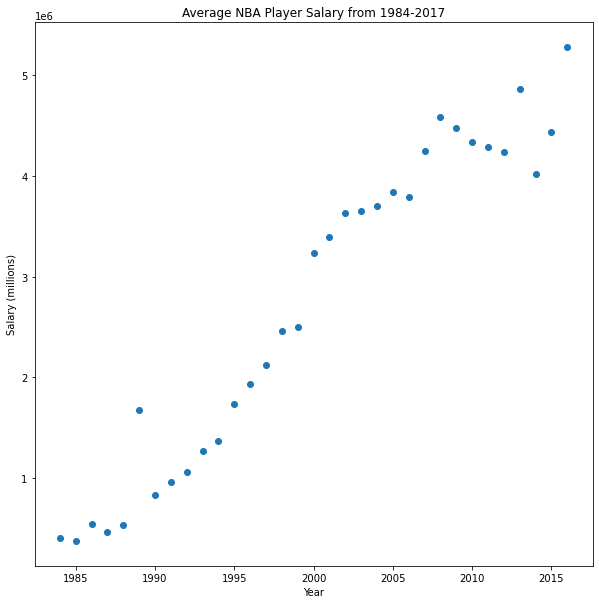

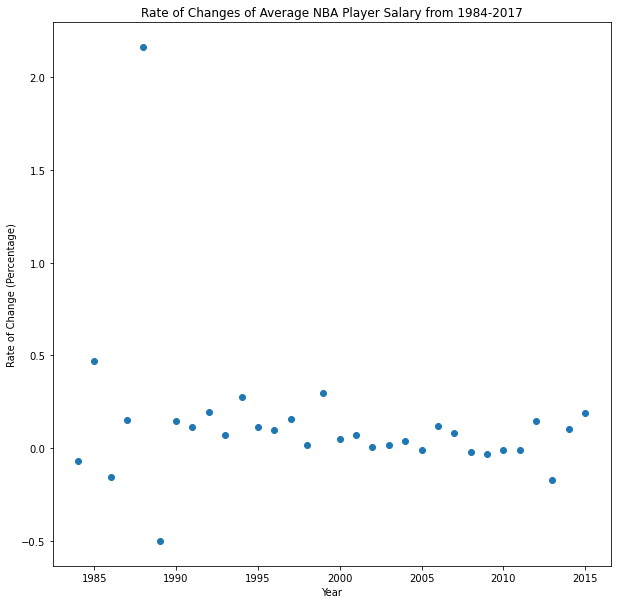

In [12]:
average_salaries = []
years = [*range(1984,2017)]
years1 = [*range(1984,2016)]
rate_of_change = []

for i in range(1984,2017):
    total_salary = seasons_salaries[i]['salary'].sum()
    average_salary = total_salary/seasons_salaries[i]['salary'].count()
    average_salaries.append(average_salary)

for i in range(0,32):
    rate = (average_salaries[i+1] - average_salaries[i])/average_salaries[i]
    rate_of_change.append(rate)

plt.figure(figsize = (10,10))
plt.title('Average NBA Player Salary from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Salary (millions)')
plt.scatter(years, average_salaries)
m, b = np.polyfit(years, average_salaries, 1)
print("y = ",m,"x + ",b)
m, m1, b = np.polyfit(years, average_salaries, 2)
print('y = ',m1, 'x^(2) + ',m, 'x + ',b)

plt.figure(figsize = (10,10))
plt.title('Rate of Changes of Average NBA Player Salary from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Rate of Change (Percentage)')
plt.scatter(years1, rate_of_change)

plt.show()

&emsp;&emsp;Looking at the graph of the rate of change of NBA salaries over time, there is an obvious outlier in 1989, when the average salary of NBA players was $1,681,290.32. However, when looking at the average NBA player salary over time, it looks like a fairly linear trend, with the equation f(x) = 158542.92016361566*x -314381400.42691797 estimating the average salary of an NBA player in year x. This graph looks as expected because the value of the dollar decreases year by year, so we can expect the salaries of NBA players to thus increase year by year. 

# NBA Player Analysis by Position

## Relationship between Position and Salary

&emsp;&emsp;Adding onto the previous section, we will analyze NBA players by position. Just like we categorized the salaries dataframe by years in the previous section, we will categorize the salaries dataframe by position. 5 different lists were created for each position. Then, the players dataframe will be iterated, and when the position column is equal to a certain position, it will be added to that specific list. For example, if I was iterating through the players dataframe and came upon Stephen Curry, I would add his row to the point guard list. In the case that players play two or more positions, they will be added to multiple lists. Similar to the previous section, a dictionary labeled positions_salaries is created, and each index from 1-5 will contain a dataframe that is created using the lists. The final step is to obtain the salaries for each of these players. We will merge the dataframes in positions_salaries with the salaries dataframe so that we can see the players' name, position, year with how much they earned each year.  The resulting dataframe for the point guards is shown below. 

In [13]:
pg_list = []
sg_list = []
sf_list = []
pf_list = []
c_list = []

for index, row in players.iterrows():
    if 'Center' in row['position']:
        c_list.append((row['_id'],row['name'],row['position'],row['weight'],row['height']))
    if 'Power Forward' in row['position']:
        pf_list.append((row['_id'],row['name'],row['position'],row['weight'],row['height']))
    if 'Small Forward' in row['position']:
        sf_list.append((row['_id'],row['name'],row['position'],row['weight'],row['height']))
    if 'Shooting Guard' in row['position']:
        sg_list.append((row['_id'],row['name'],row['position'],row['weight'],row['height']))
    if 'Point Guard' in row['position']:
        pg_list.append((row['_id'],row['name'],row['position'],row['weight'],row['height']))

positions_salaries = {}

positions_salaries[1] = pd.DataFrame(pg_list, columns = ['player_id','name','position','weight','height'])
positions_salaries[2] = pd.DataFrame(sg_list, columns = ['player_id','name','position','weight','height'])
positions_salaries[3] = pd.DataFrame(sf_list, columns = ['player_id','name','position','weight','height'])
positions_salaries[4] = pd.DataFrame(pf_list, columns = ['player_id','name','position','weight','height'])
positions_salaries[5] = pd.DataFrame(c_list, columns = ['player_id','name','position','weight','height'])


for x in positions_salaries:
    positions_salaries[x] = positions_salaries[x].merge(salaries,on='player_id')


positions_salaries[1]


,player_id,name,position,weight,height,league,salary,season,season_end,season_start,team
0,abdulma02,Mahmoud Abdul-Rauf,Point Guard,162lb,2021-06-01,NBA,1660000,1990-91,1991,1990,Denver Nuggets
1,abdulma02,Mahmoud Abdul-Rauf,Point Guard,162lb,2021-06-01,NBA,2008000,1991-92,1992,1991,Denver Nuggets
2,abdulma02,Mahmoud Abdul-Rauf,Point Guard,162lb,2021-06-01,NBA,2358000,1992-93,1993,1992,Denver Nuggets
3,abdulma02,Mahmoud Abdul-Rauf,Point Guard,162lb,2021-06-01,NBA,1825000,1993-94,1994,1993,Denver Nuggets
4,abdulma02,Mahmoud Abdul-Rauf,Point Guard,162lb,2021-06-01,NBA,2200000,1994-95,1995,1994,Denver Nuggets
...,...,...,...,...,...,...,...,...,...,...,...
3528,youngda01,Danny Young,Point Guard,175lb,2021-06-03,NBA,550000,1991-92,1992,1991,Portland Trail Blazers
3529,youngda01,Danny Young,Point Guard,175lb,2021-06-03,NBA,150000,1994-95,1995,1994,Milwaukee Bucks
3530,youngjo01,Joe Young,Point Guard,180lb,2021-06-02,NBA,1000000,2015-16,2016,2015,Indiana Pacers
3531,youngjo01,Joe Young,Point Guard,180lb,2021-06-02,NBA,1052342,2016-17,2017,2016,Indiana Pacers


&emsp;&emsp;Now that we have specific dataframes containing player names, positions, years, and salaries, we can start plotting our data. 5 different graphs are created below, each plotting position salaries by year. To find the highest paid player for each position, idmax() is used to find the index of the row with the highest value in the 'salaries' column. Then, we can obtain the salary, year, and name of the highest paid player in each position. 

Highest Paid PG in history: $ 34682550 Stephen Curry
Highest Paid SG in history: $ 33285709 LeBron James
Highest Paid SF in history: $ 33285709 LeBron James
Highest Paid PF in history: $ 33285709 LeBron James
Highest Paid C in history: $ 28000000 Kevin Garnett


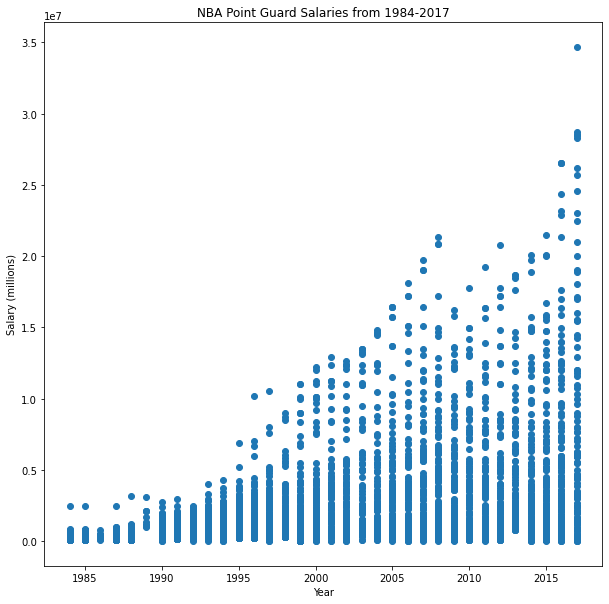

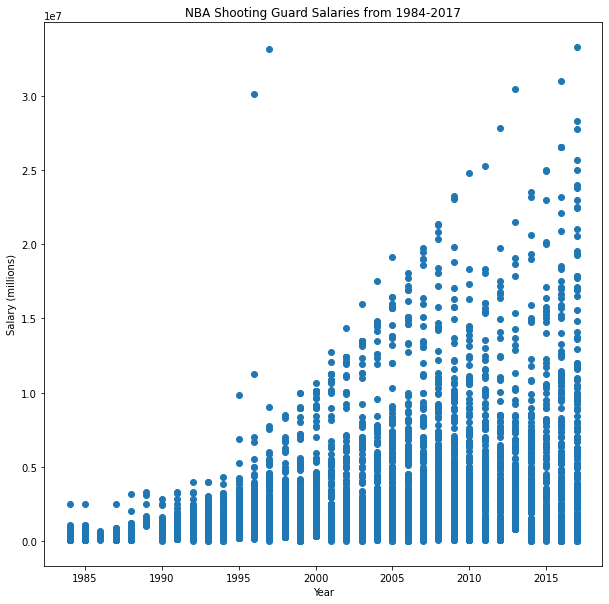

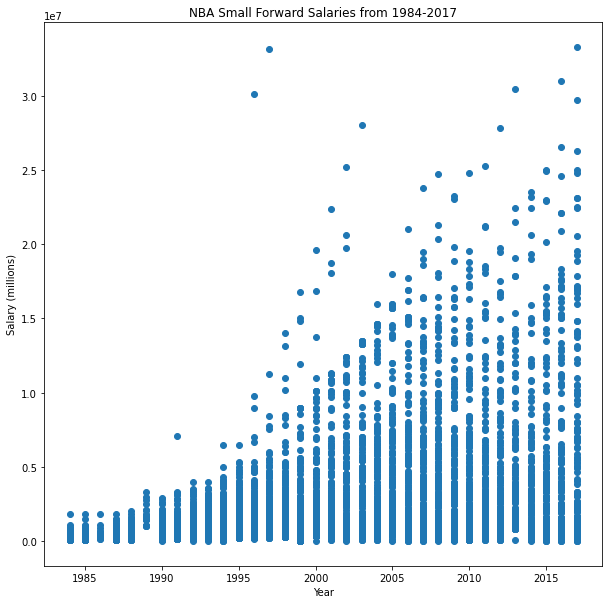

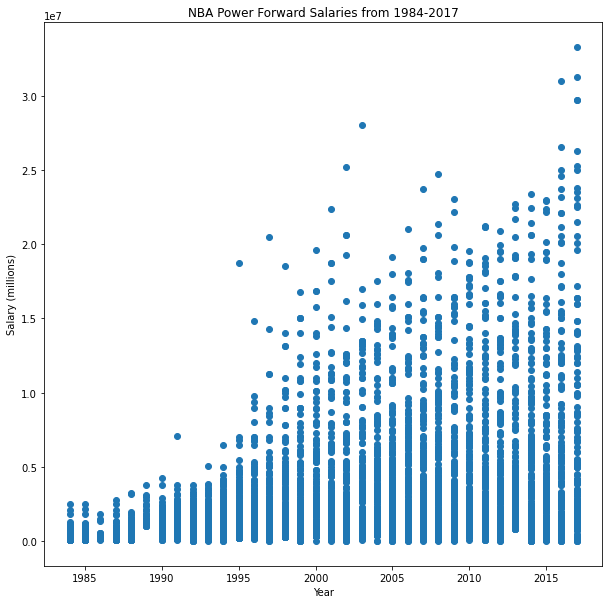

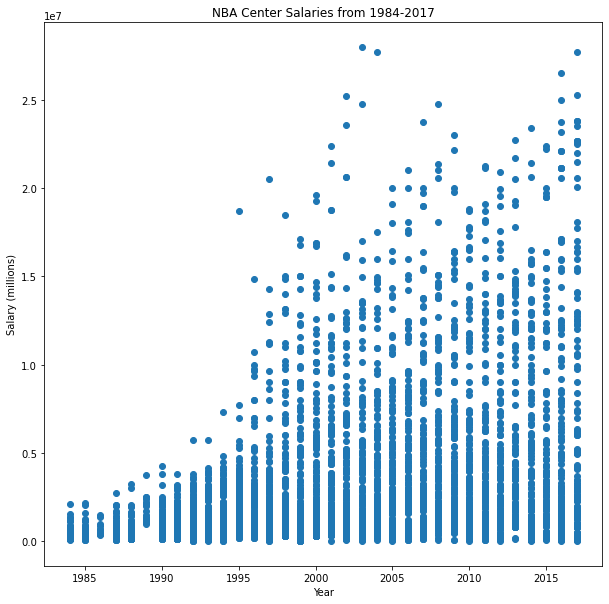

In [14]:
plt.figure(figsize = (10,10))
plt.title('NBA Point Guard Salaries from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Salary (millions)')
plt.scatter(positions_salaries[1]['season_start'],positions_salaries[1]['salary'])
highest_paid_pg = positions_salaries[1]['salary'].idxmax()
print("Highest Paid PG in history: $", positions_salaries[1]['salary'].max(), positions_salaries[1].iloc[highest_paid_pg]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Shooting Guard Salaries from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Salary (millions)')
plt.scatter(positions_salaries[2]['season_start'],positions_salaries[2]['salary'])
highest_paid_pg = positions_salaries[2]['salary'].idxmax()
print("Highest Paid SG in history: $", positions_salaries[2]['salary'].max(), positions_salaries[2].iloc[highest_paid_pg]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Small Forward Salaries from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Salary (millions)')
plt.scatter(positions_salaries[3]['season_start'],positions_salaries[3]['salary'])
highest_paid_pg = positions_salaries[3]['salary'].idxmax()
print("Highest Paid SF in history: $", positions_salaries[3]['salary'].max(), positions_salaries[3].iloc[highest_paid_pg]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Power Forward Salaries from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Salary (millions)')
plt.scatter(positions_salaries[4]['season_start'],positions_salaries[4]['salary'])
highest_paid_pg = positions_salaries[4]['salary'].idxmax()
print("Highest Paid PF in history: $", positions_salaries[4]['salary'].max(), positions_salaries[4].iloc[highest_paid_pg]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Center Salaries from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Salary (millions)')
plt.scatter(positions_salaries[5]['season_start'],positions_salaries[5]['salary'])
highest_paid_pg = positions_salaries[5]['salary'].idxmax()
print("Highest Paid C in history: $", positions_salaries[5]['salary'].max(), positions_salaries[5].iloc[highest_paid_pg]['name'])

&emsp;&emsp;The highest paid player for each position (from 1984-2017) are Stephen Curry, LeBron James, LeBron James, LeBron James, and Kevin Garnett. What's most surprising about this information is that Michael Jordan was one of the highest paid small forwards and shooting guards even though he earned that salary in 1996. One can see the extreme outlier in the Small Forward and Shooting Guard Salaries graph. We can see that all the positions get paid relatively the same, however there are more point guards that are getting paid above 25 million per year than any other position. It looks like the centers are getting paid the least out of all the positions, with their maximum salary not reaching the 30 million benchmark. Once again, we can observe the evident upwards trend of NBA players' salaries. <br><br>
&emsp;&emsp;The award for "Highest Paid NBA Player" goes to Steph Curry, who got paid $34,682,550 in his 2017-2018 season with the Warriors! Just a week ago, he overtook Ray Allen to be the NBA player with the most career three pointers made! 



In [41]:
from IPython.display import Image

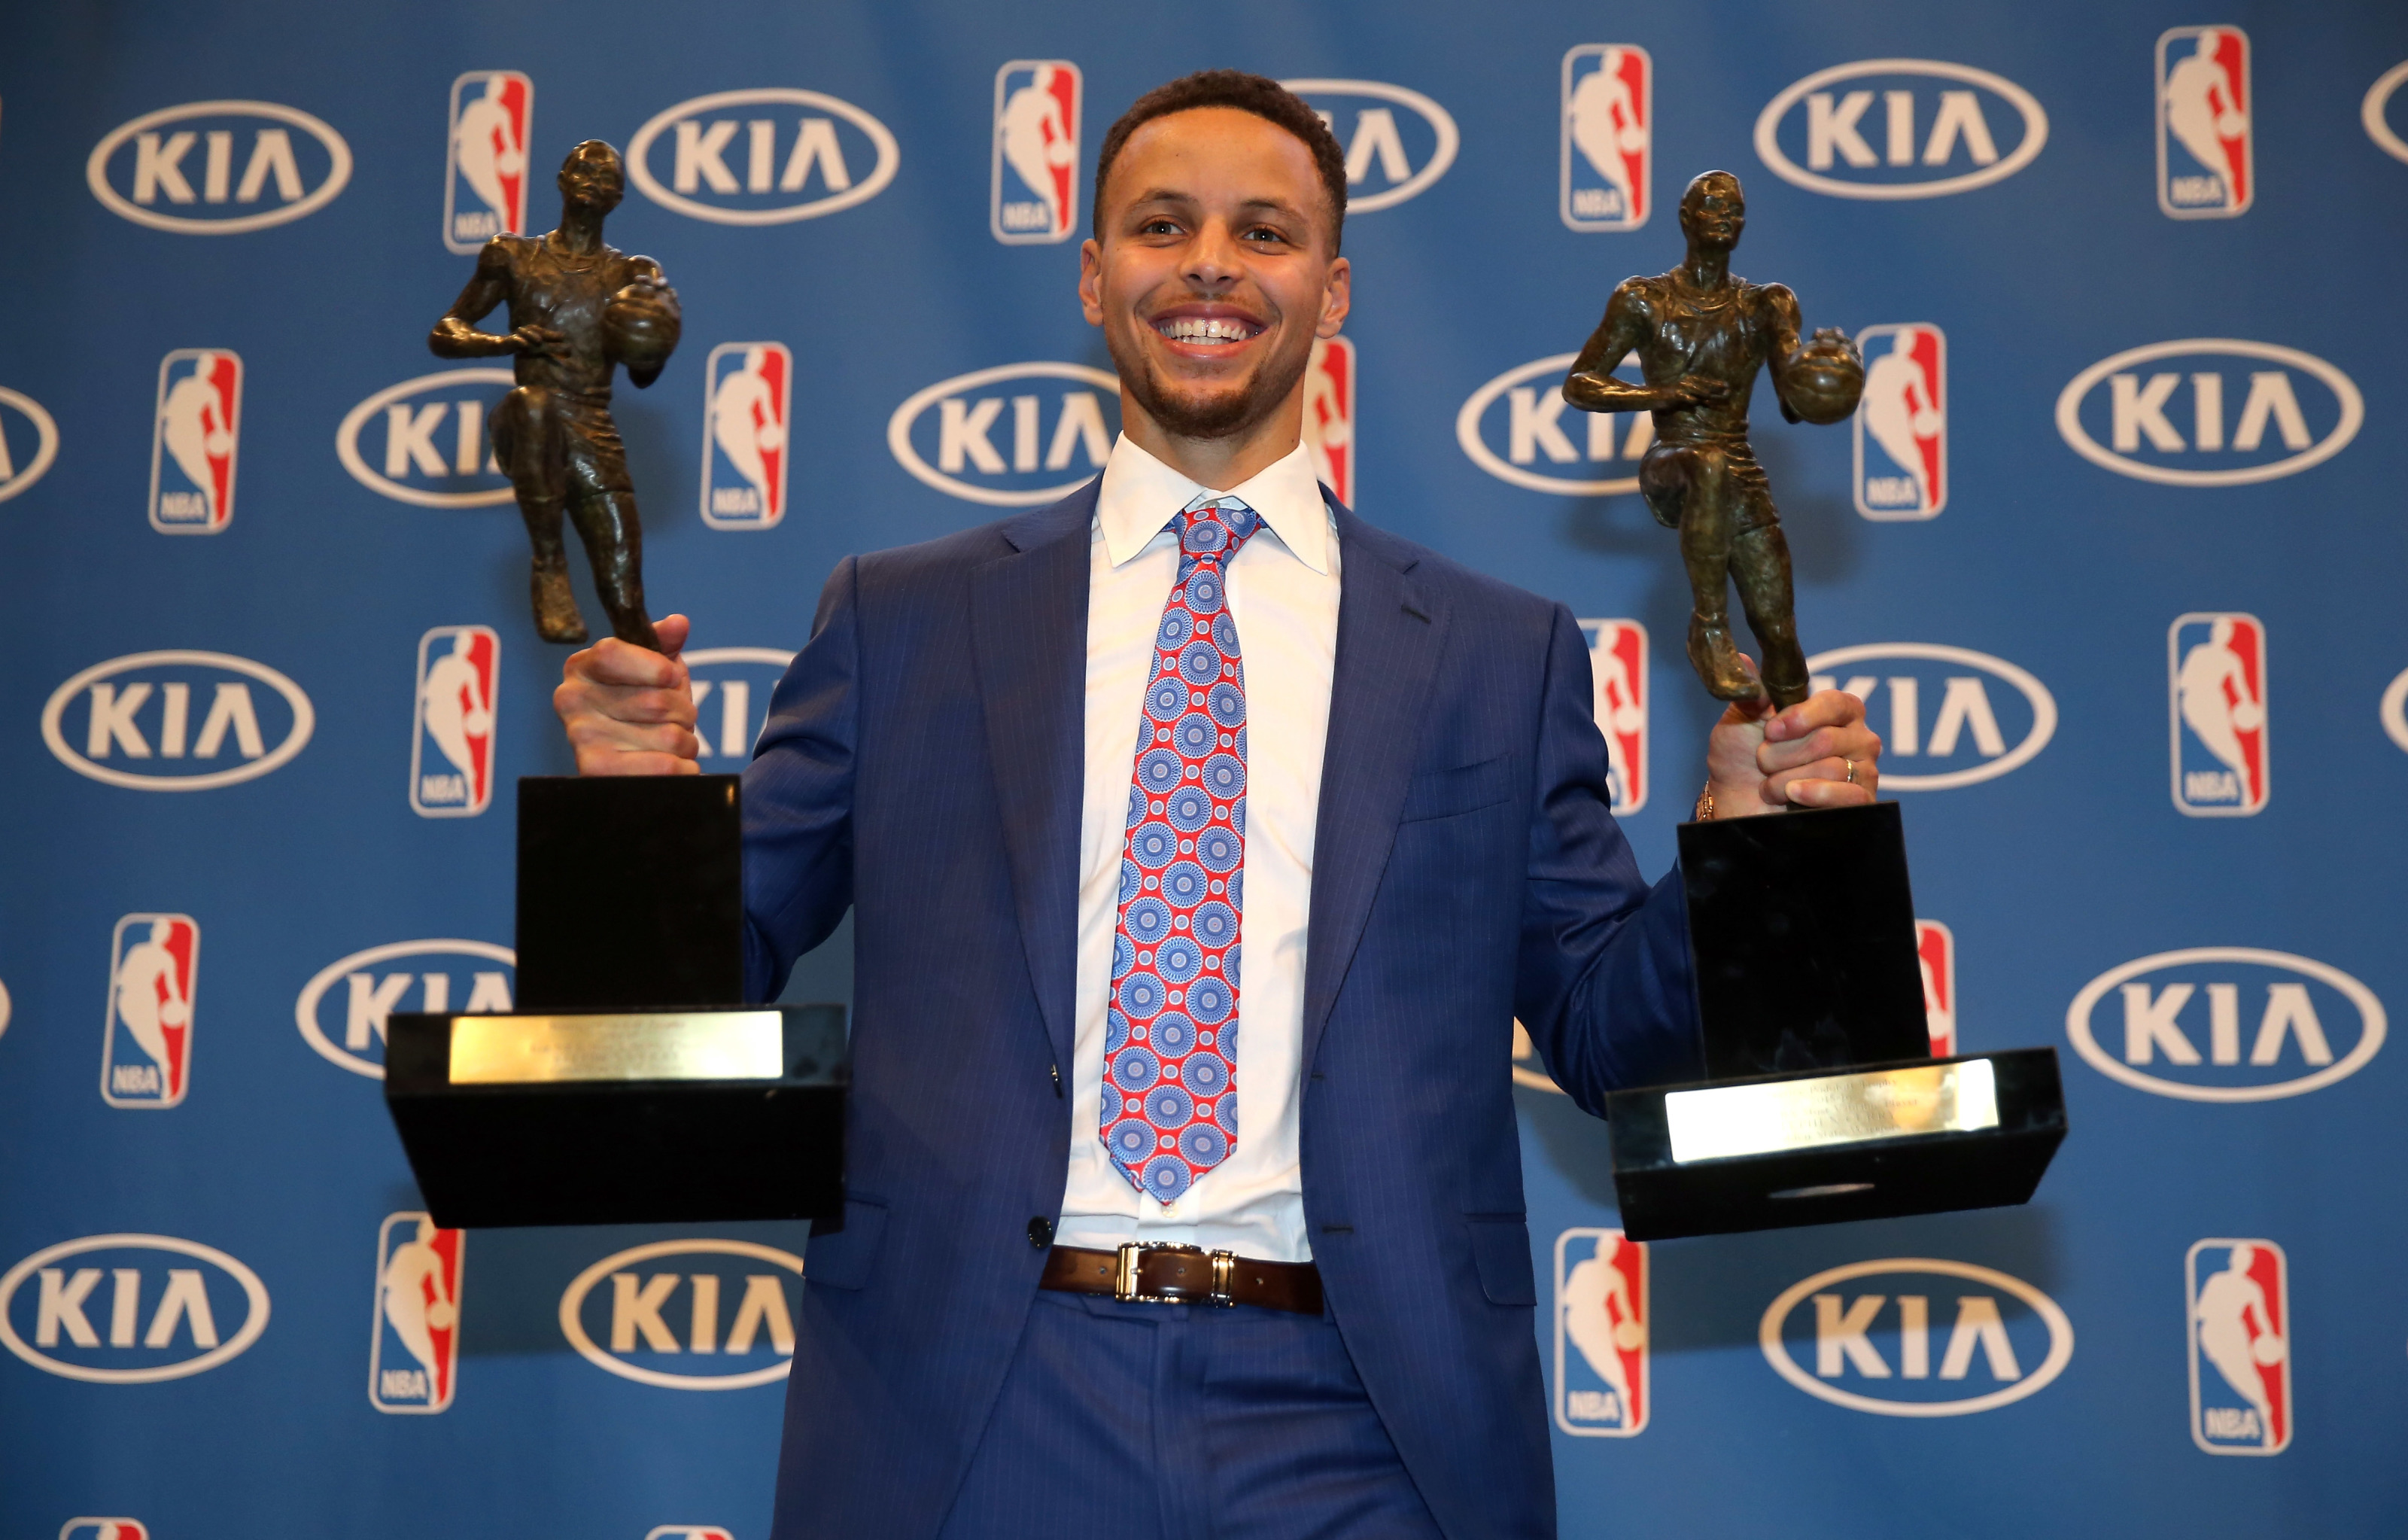

In [53]:
Image('Steph.jpeg')

## Relationship between Player Height and Position

&emsp;&emsp;Next, we will observe the player's heights by position to see if there are any patterns over time (Ex: have point guards gotten taller?). There was actually an error when I converted the csv file to an excel file, and all the players' heights were registered as date format (6 foot 11 would be June 11 2021). The code below iterates through each the position dataframes, and then convert the height, which is currently type timestamp, into an integer. I used the strftime() method to obtain the month and date, then multiplied the month by 12 and took the sum of the resulting number and the date. The final sum should be the player's height in inches. Because we are only concerned with the player's name, year, and height, we will create a new dataframe called players_heights that only consists of the necessary information. The dataframe player_heights for point guards is shown below. 

In [15]:
heights = {}
players_heights = {}

for i in range(1,6):
    heights[i] = []
    for index, row in positions_salaries[i].iterrows():
        height_str = row['height'].strftime("%m %d")
        feet = int(height_str[:2])
        inches = int(height_str[-2:])
        heights[i].append(feet*12 + inches)
    players_heights[i] = pd.DataFrame(zip(positions_salaries[i]['name'],positions_salaries[i]['season_start'],heights[i]),columns = ['name','year','height'])
        
        
players_heights[1]

,name,year,height
0,Mahmoud Abdul-Rauf,1990,73
1,Mahmoud Abdul-Rauf,1991,73
2,Mahmoud Abdul-Rauf,1992,73
3,Mahmoud Abdul-Rauf,1993,73
4,Mahmoud Abdul-Rauf,1994,73
...,...,...,...
3528,Danny Young,1991,75
3529,Danny Young,1994,75
3530,Joe Young,2015,74
3531,Joe Young,2016,74


&emsp;&emsp;Now that we have height data for each position, we can plot the points. Using the players_heights dictionary, the height column is plotted against the year column. Similar to the last graphs, there will be 5 (1 per position). To find the tallest player for each position, idmax() is used to find the index of the row with the highest value in the 'height' column. Then, we can obtain the height and name of the tallest player in each position. To find the shortest player for each position, the same steps are used, but idmin() is used instead of idmax(). The goal is to find any patterns in each position's height over time.  

Data from 1984-2017:
Tallest PG:  83 Giannis Antetokounmpo
Shortest PG:  63 Muggsy Bogues
Tallest SG:  83 Giannis Antetokounmpo
Shortest SG:  65 Earl Boykins
Tallest SF:  85 Brad Sellers, Nikoloz Tskitishvili
Shortest SF:  75 John Morton, Larry Robinson
Tallest PF:  88 Ralph Sampson
Shortest PF:  77 Byron Houston
Tallest C:  91 Manute Bol, Gheorghe Muresan
Shortest C:  78 Chuck Hayes


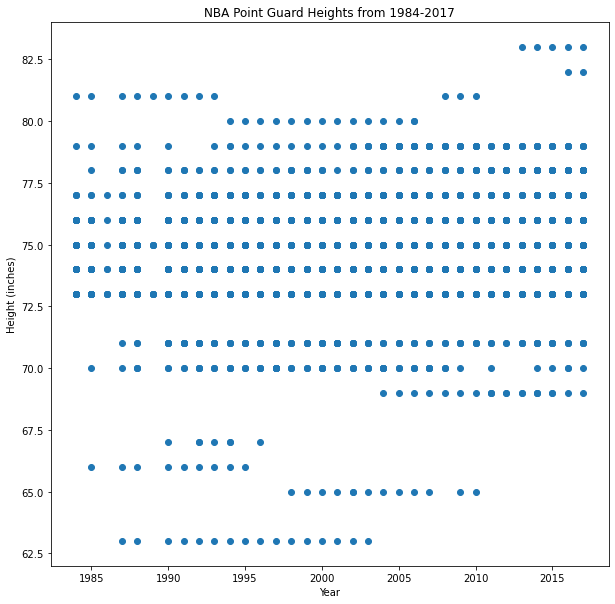

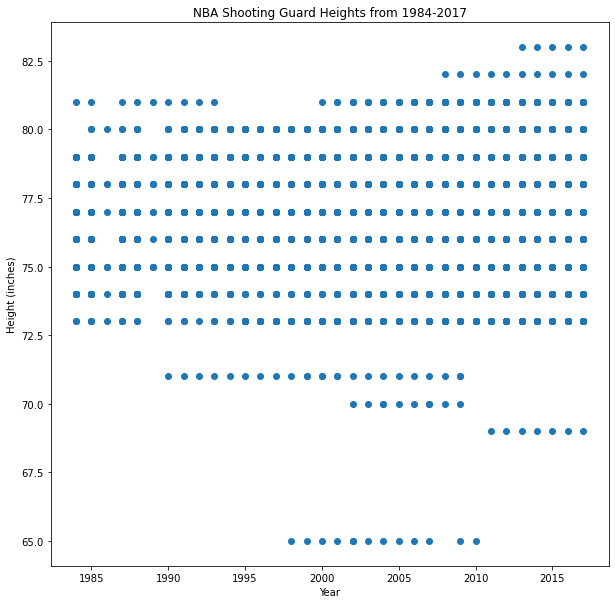

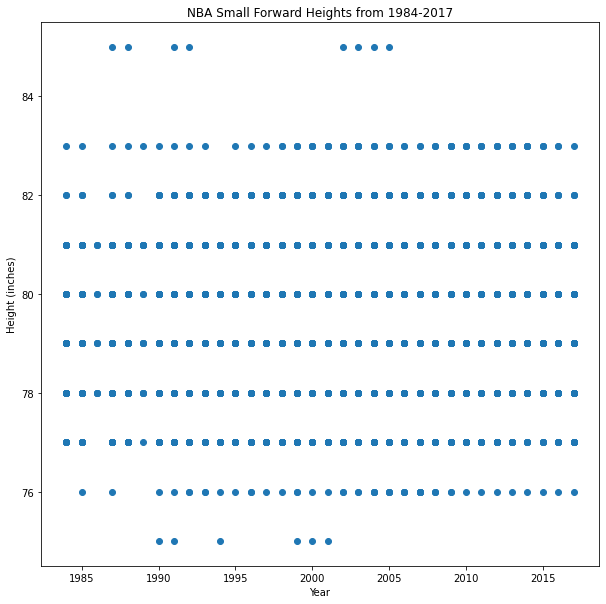

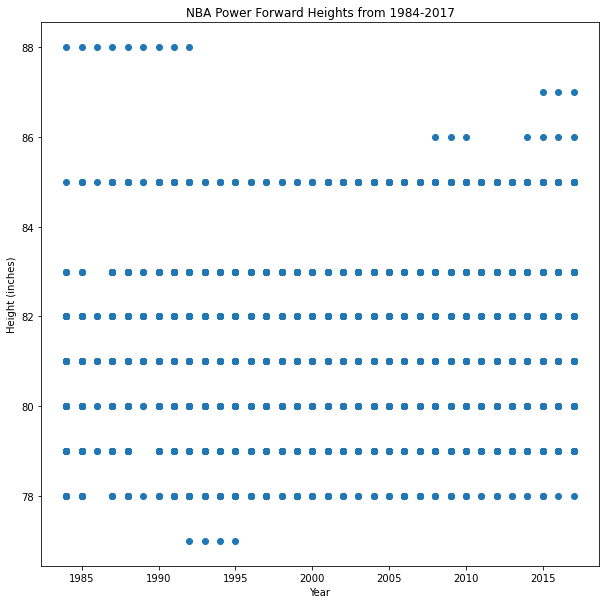

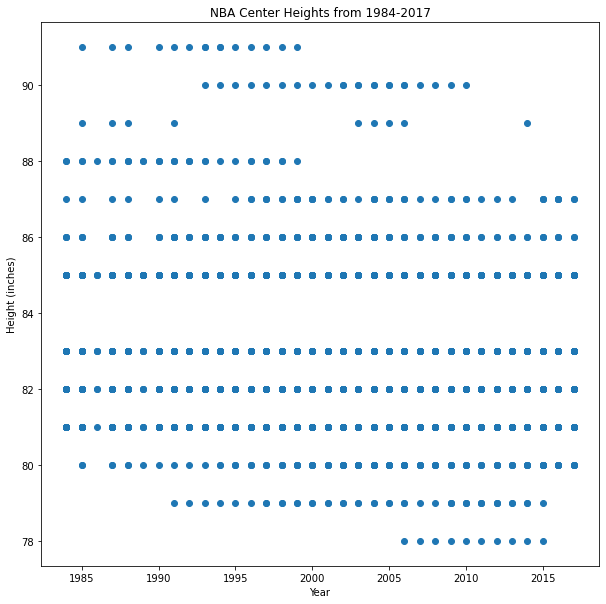

In [16]:
print("Data from 1984-2017:")
plt.figure(figsize = (10,10))
plt.title('NBA Point Guard Heights from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Height (inches)')
plt.scatter(players_heights[1]['year'],players_heights[1]['height'])
tallest_pg = players_heights[1]['height'].idxmax()
shortest_pg = players_heights[1]['height'].idxmin()
print("Tallest PG: ", players_heights[1]['height'].max(), players_heights[1].iloc[tallest_pg]['name'])
print("Shortest PG: ", players_heights[1]['height'].min(), players_heights[1].iloc[shortest_pg]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Shooting Guard Heights from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Height (inches)')
plt.scatter(players_heights[2]['year'],players_heights[2]['height'])
tallest_sg = players_heights[2]['height'].idxmax()
shortest_sg = players_heights[2]['height'].idxmin()
print("Tallest SG: ", players_heights[2]['height'].max(), players_heights[2].iloc[tallest_sg]['name'])
print("Shortest SG: ", players_heights[2]['height'].min(), players_heights[2].iloc[shortest_sg]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Small Forward Heights from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Height (inches)')
plt.scatter(players_heights[3]['year'],players_heights[3]['height'])
tallest_sf = players_heights[3]['height'].idxmax()
shortest_sf = players_heights[3]['height'].idxmin()
print("Tallest SF: ", players_heights[3]['height'].max(), "Brad Sellers, Nikoloz Tskitishvili")
print("Shortest SF: ", players_heights[3]['height'].min(), "John Morton, Larry Robinson")

plt.figure(figsize = (10,10))
plt.title('NBA Power Forward Heights from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Height (inches)')
plt.scatter(players_heights[4]['year'],players_heights[4]['height'])
tallest_pf = players_heights[4]['height'].idxmax()
shortest_pf = players_heights[4]['height'].idxmin()
print("Tallest PF: ", players_heights[4]['height'].max(), players_heights[4].iloc[tallest_pf]['name'])
print("Shortest PF: ", players_heights[4]['height'].min(), players_heights[4].iloc[shortest_pf]['name'])

plt.figure(figsize = (10,10))
plt.title('NBA Center Heights from 1984-2017')
plt.xlabel('Year')
plt.ylabel('Height (inches)')
plt.scatter(players_heights[5]['year'],players_heights[5]['height'])
tallest_c = players_heights[5]['height'].idxmax()
shortest_c = players_heights[5]['height'].idxmin()
print("Tallest C: ", players_heights[5]['height'].max(), "Manute Bol, Gheorghe Muresan")
print("Shortest C: ", players_heights[5]['height'].min(), players_heights[5].iloc[shortest_c]['name'])

#print(players_heights[1].loc[players_heights[1]['height'] == 63])

Tallest PG: Giannis Antetokounmpo at 6ft 11in. <br>
Smallest PG: Muggsy Bogues at 5ft 3in.<br>
Tallest SG: Giannis Antetokounmpo at 6ft 11in. <br>
Smallest SG: Earl Boykins at 5ft. 5 in.<br>
Tallest SF: Brad Sellers and Nikoloz Tskitishvili at 7ft 1in. <br>
Smallest SF: John Morton and Larry Robinson at 6ft 3in. <br>
Tallest PF: Ralph Sampson at 7ft 4 in.<br>
Smallest PF: Byron Houston at 6ft 5in. <br>
Tallest C: Manute Bol and Gheorghe Muresan at 7ft 7in. <br>
Smallest C: Chuck Hayes at 6ft 6in. <br> <br>
&emsp;&emsp;A note for the tallest players in each position, it may not be the answer most people expect. Giannis was registered as a guard from 2013-2017, so although he is currently a forward, he was still technically the tallest pointguard from 1984-2017. <br><br> 
&emsp;&emsp;Starting with the point guard heights, there seems to be a general upwards trend of NBA point guards' heights. This can actually be seen in real life, as point guards who are getting drafted nowadays are significantly taller than they were in the past (LaMelo Ball at 6ft 7in., Luke Doncic also at 6ft 7in.). The minimum height for point guards was Muggsy Bogues for a period of time, which was an anamoly. Shooting Guards heights are seen to have a slight decreasing trend, but this can be interpreted as constant due to the fact that more point guards are playing dual guard positions (both point gaurd and shooting guard). Small Forwards and Power Forwards seem to have a slight increasing trend, while Centers seem to have a slight decreasing trend. While it seems advantageous to have a tall center, it could be that teams nowadays are focusing more on technical abilities rather than pure height when choosing a center (rather have a center that can shoot the ball relatively wall or is agile than a center who is just tall). If there is anything that can be concluded from the 5 graphs, it is that more teams are not selecting "overly tall" players taller than 7ft. This may be because of how much faster the league has gotten, in addition to how players are more technically gifted in all the positions. <br><br>
&emsp;&emsp;The "Tallest NBA Player" Award goes to Manute Bol and Gheorghe Muresan, who both stood at a staggering 7 foot 7 inches! Both players were centers. 


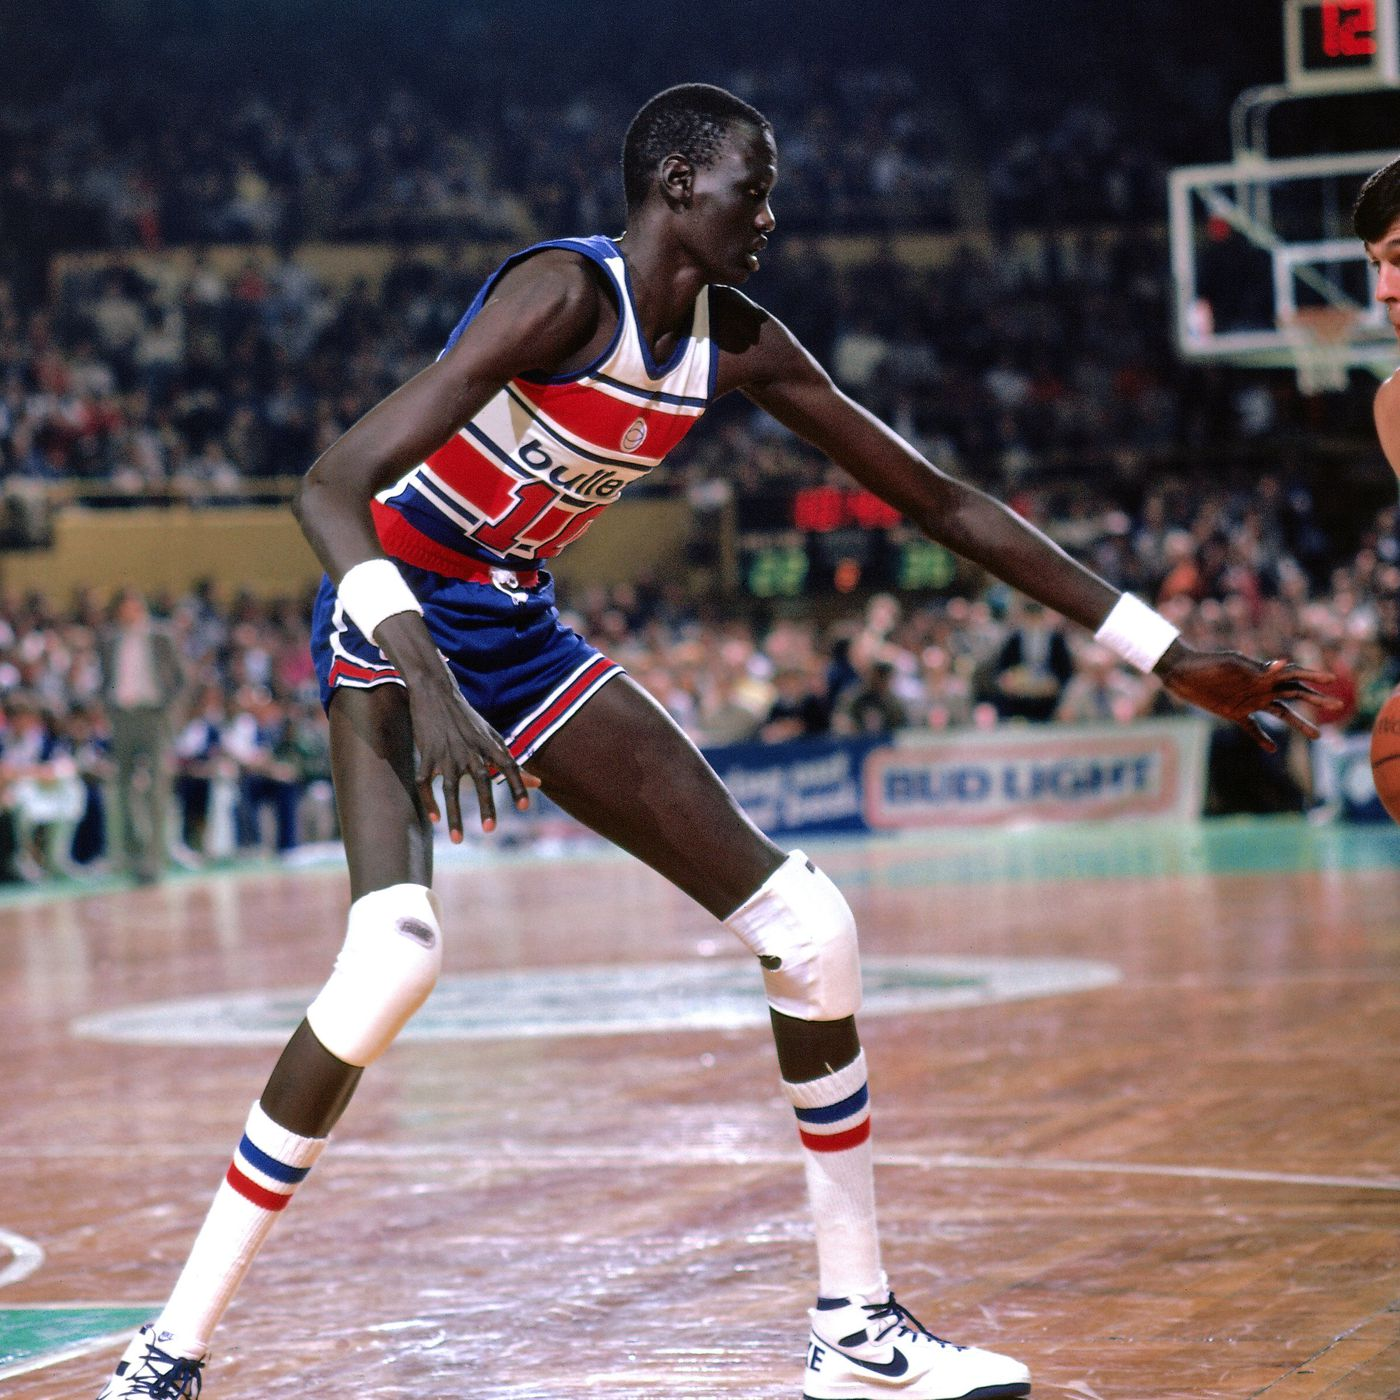

In [58]:
Image('Manute Bol.jpg')

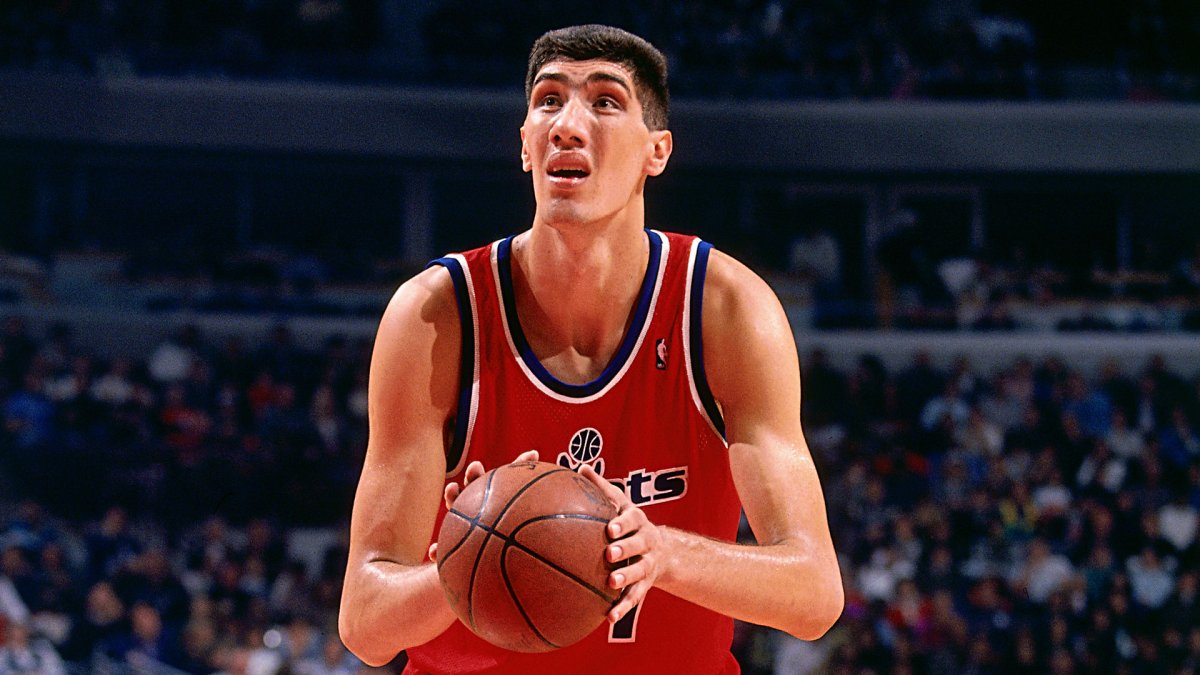

In [57]:
Image('Muresan.jpg')

# Most "Salary Efficient" Player

&emsp;&emsp;In this section, we will determine which player was the most efficient based on his salary. Dividing players' offensive rating (calculated in the earlier part of the project) by the salary, we can form some sort of salary efficiency statistic, which tells how well a player performed based on his salary. First, however, we need the offensive ratings of the players, which was calculated earlier in the project. We will merge the dataframe that has those offensive ratings with the dictionary that has all the player salaries dataframe by year. Shown below is the resulting dataframe from year 1984 (note that it now includes the offensive rating).

In [17]:
names = combined.index
off_rating = combined['overall_off_rating']

players_ratings = pd.DataFrame(zip(names,off_rating), columns = ['name','off_rating'])

for i in range(1984,2017):
    seasons_salaries[i] = seasons_salaries[i].merge(players_ratings,on='name')

seasons_salaries[1984]

,league,player_id,salary,season,season_end,season_start,team,name,position,off_rating
0,NBA,abdulka01,1530000.0,1984-85,1985.0,1984.0,Los Angeles Lakers,Kareem Abdul-Jabbar,Center,7.193745
1,NBA,adamsal01,500000.0,1984-85,1985.0,1984.0,Phoenix Suns,Alvan Adams,Center and Power Forward,2.770245
2,NBA,aguirma01,800000.0,1984-85,1985.0,1984.0,Dallas Mavericks,Mark Aguirre,Small Forward,6.233889
3,NBA,aingeda01,400000.0,1984-85,1985.0,1984.0,Boston Celtics,Danny Ainge,Shooting Guard and Point Guard,5.175820
4,NBA,baglejo01,209000.0,1984-85,1985.0,1984.0,Cleveland Cavaliers,John Bagley,Point Guard,1.074817
...,...,...,...,...,...,...,...,...,...,...
331,NBA,woodal01,450000.0,1984-85,1985.0,1984.0,Seattle SuperSonics,Al Wood,Small Forward and Shooting Guard,0.625532
332,NBA,woodle01,215000.0,1984-85,1985.0,1984.0,Philadelphia 76ers,Leon Wood,Point Guard and Shooting Guard,-0.623547
333,NBA,woodsmi01,375000.0,1984-85,1985.0,1984.0,Kansas City Kings,Mike Woodson,Shooting Guard,2.712988
334,NBA,woolror01,300000.0,1984-85,1985.0,1984.0,Chicago Bulls,Orlando Woolridge,Small Forward,3.682800


&emsp;&emsp; Now we can divide players' offensive rating (calculated in the earlier part of the project) by the salary. I created a new column in each year's dataframe called 'salary_efficiency'. To calculate this value, I divided the data in the column 'off_rating' by the 'salary' column. Because average salaries were around a million, I decided to multiply this ratio by a million so it would be more readable. Then, using idmax() on the column 'salary_efficiency' for each year, we can generate indices of players with the greatest salary efficiency. I created multiple lists, and appended each field of the respective index that we were interested in to each list (name, salary, offensive rating, efficiency, and year). These were all made into a dataframe consisting of the players with the highest salary efficiency for each year. 

In [18]:
salary_name = []
salary_salary = []
salary_offrating = []
salary_eff = []
salary_year = []

for i in range(1984,2017):
    seasons_salaries[i]['salary_efficiency'] = seasons_salaries[i]['off_rating']/seasons_salaries[i]['salary']*1000000
    efficient = seasons_salaries[i]['salary_efficiency'].idxmax()
    salary_name.append(seasons_salaries[i].iloc[efficient]['name'])
    salary_salary.append(seasons_salaries[i].iloc[efficient]['salary'])
    salary_offrating.append(seasons_salaries[i].iloc[efficient]['off_rating'])
    salary_eff.append(seasons_salaries[i].iloc[efficient]['salary_efficiency'])
    salary_year.append(seasons_salaries[i].iloc[efficient]['season_start'])
    

salary_efficient = pd.DataFrame(zip(salary_name,salary_salary,salary_offrating,salary_eff,salary_year), columns = ['name', 'salary', 'off_rating','efficiency','year'])
print(salary_efficient['name'].mode())
salary_efficient

0    John Stockton
dtype: object


,name,salary,off_rating,efficiency,year
0,Clyde Drexler,175000.0,10.329615,59.026372,1984.0
1,John Stockton,150000.0,12.499192,83.327946,1985.0
2,Joe Dumars,120000.0,5.763221,48.026838,1986.0
3,Jeff Hornacek,94000.0,7.302372,77.684813,1987.0
4,John Stockton,300000.0,12.499192,41.663973,1988.0
5,John Stockton,1050000.0,12.499192,11.903992,1989.0
6,Avery Johnson,50000.0,3.992597,79.851930,1990.0
7,Vinnie Johnson,130000.0,5.021718,38.628601,1991.0
8,Kiki Vandeweghe,140000.0,6.153659,43.954708,1992.0
9,Lester Conner,25000.0,1.218040,48.721594,1993.0


&emsp;&emsp;It turns out John Stockton was the most frequent best "value" player, being the most salary efficient player 3 different years. It is also interesting to note that Michael Jordan was the best value player in 2001, when his salary was only a million dollars. This statistic could be skewed by abnromally low salaries, such as Ish Smith who only earned 116,768 in 2011. Player's earning the minimnum or veteran's minimum could be looking to join a good team that is already close to their salary cap. However, the Best "Bang for your Buck" player is Pooh Richardson in his 1999-2000 season with the Detroit Pistons, which is also the year he retired. 

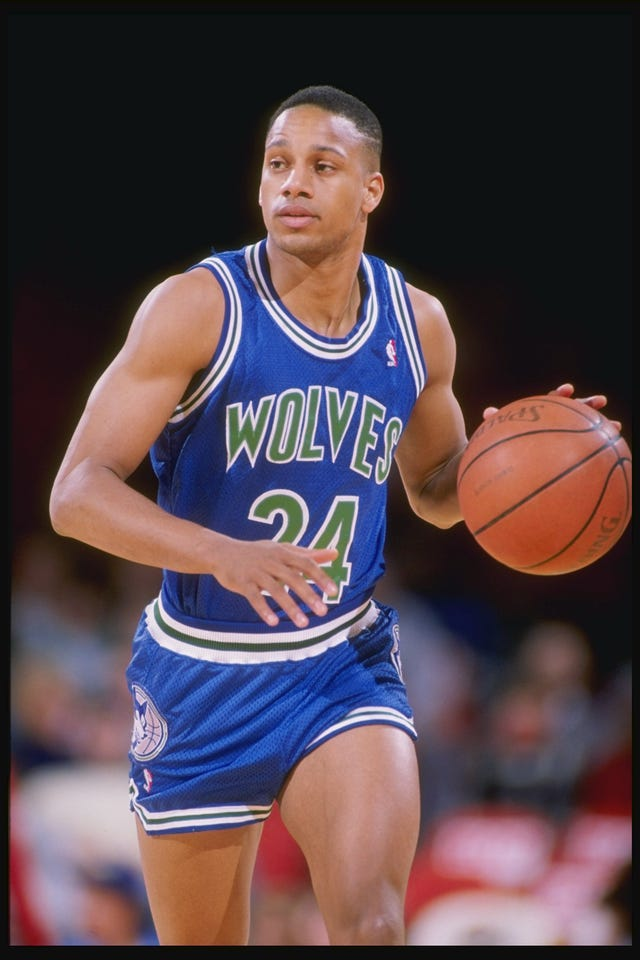

In [59]:
Image('Pooh Richardson.jpg')

## Most "Height Efficient" Player

&emsp;&emsp;In this section, we will determine which player was the most efficient based on his height. Dividing players' offensive rating (calculated in the earlier part of the project) by the height, we can form some sort of height efficiency statistic, which tells how well a player performed based on his height. First, however, we need the offensive ratings of the players, which was calculated earlier in the project. We will merge the dataframe that has those offensive ratings with the dictionary that has all the player heights dataframe. Shown below is the resulting dataframe from year 1984 (note that it now includes the offensive rating). 

In [22]:
for i in range(1,6):
    players_heights[i] = players_heights[i].merge(players_ratings,on='name')
    
players_heights[1]

,name,year,height,off_rating_x,off_rating_y,off_rating
0,Mahmoud Abdul-Rauf,1990,73,2.345667,2.345667,2.345667
1,Mahmoud Abdul-Rauf,1991,73,2.345667,2.345667,2.345667
2,Mahmoud Abdul-Rauf,1992,73,2.345667,2.345667,2.345667
3,Mahmoud Abdul-Rauf,1993,73,2.345667,2.345667,2.345667
4,Mahmoud Abdul-Rauf,1994,73,2.345667,2.345667,2.345667
...,...,...,...,...,...,...
12382,Danny Young,1991,75,0.182211,0.182211,0.182211
12383,Danny Young,1994,75,0.182211,0.182211,0.182211
12384,Joe Young,2015,74,-1.399269,-1.399269,-1.399269
12385,Joe Young,2016,74,-1.399269,-1.399269,-1.399269


&emsp;&emsp; Now we can divide players' offensive rating (calculated in the earlier part of the project) by their height. I created a new column in each year's dataframe called 'height_efficiency'. To calculate this value, I divided the data in the column 'off_rating' by the 'height' column. Because average heights were at least two digits, I decided to multiply this ratio by a 100 so it would be more readable. Then, using idmax() on the column 'height_efficiency' for each year, we can generate indices of players with the greatest height efficiency. This is very similar to finding the most efficient player based on his salary. The only difference is the variable names and column names. 

In [27]:
height_name = []
height_height = []
height_offrating = []
height_eff = []
height_year = []

for i in range(1,6):
    players_heights[i]['height_efficiency'] = players_heights[i]['off_rating_x']/players_heights[i]['height']*100
    efficient = players_heights[i]['height_efficiency'].idxmax()
    height_name.append(players_heights[i].iloc[efficient]['name'])
    height_height.append(players_heights[i].iloc[efficient]['height'])
    height_offrating.append(players_heights[i].iloc[efficient]['off_rating_x'])
    height_eff.append(players_heights[i].iloc[efficient]['height_efficiency'])
    height_year.append(players_heights[i].iloc[efficient]['year'])
    
height_efficient = pd.DataFrame(zip(height_name,height_height,height_offrating,height_eff,height_year), columns = ['name', 'height', 'off_rating','efficiency','year'])
print(height_efficient['name'].mode())
height_efficient

0    LeBron James
dtype: object


,name,height,off_rating,efficiency,year
0,John Stockton,73,12.499192,17.122181,1985
1,LeBron James,80,14.868072,18.585090,2003
2,LeBron James,80,14.868072,18.585090,2003
3,LeBron James,80,14.868072,18.585090,2003
4,Shaquille O'Neal,85,13.997653,16.467828,1992


&emsp;&emsp;It turns out John Stockton is the most height efficient point guard, LeBron James is the most height efficient Shooting Guard, Small Forward, and Power Forward, and Shaquille O'Neal is the most height efficient Center. LeBron James is overall the most "height efficient" player with an offensive rating of 14.868072 in his 2003-2004 season! Let's graph player's efficiency based on height to see where he stands among other players. 

In [62]:
Image('LEBRON JAMES.jfif')

ValueError: Cannot embed the 'jfif' image format

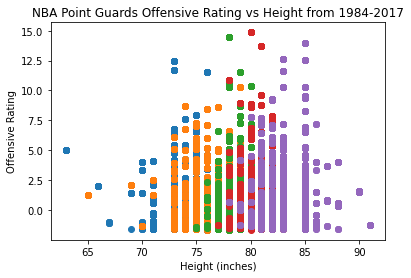

In [40]:
y = players_heights[1]['off_rating']
x = players_heights[1]['height']
plt.scatter(x,y, label = 'PG')
plt.title('NBA Point Guards Offensive Rating vs Height from 1984-2017')
plt.xlabel('Height (inches)')
plt.ylabel('Offensive Rating');

y = players_heights[2]['off_rating']
x = players_heights[2]['height']
plt.scatter(x,y, label = 'SG');

y = players_heights[3]['off_rating']
x = players_heights[3]['height']
plt.scatter(x,y, label = 'SF');

y = players_heights[4]['off_rating']
x = players_heights[4]['height']
plt.scatter(x,y, label = 'PF');

y = players_heights[5]['off_rating']
x = players_heights[5]['height']
plt.scatter(x,y, label = 'C');

&emsp;&emsp;It looks like there is actually an interval of player height where when going outside of the interval, player efficiency falls.It seems to be between 6ft 1in. and 7ft 1in.  